<a href="https://colab.research.google.com/github/racoonjonny/Speed_Estimation_LSTM/blob/main/Model_Validation_(speed_estimation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# 3. label/feature용 데이터 load

Vw_max = np.load('./saved_model/Vw_max.npy')
Vw_min = np.load('./saved_model/Vw_min.npy')

Vx_max = np.load('./saved_model/Vx_max.npy')
Vx_min = np.load('./saved_model/Vx_min.npy')

Vx_kalman_max = np.load('./saved_model/Vx_kalman_max.npy')
Vx_kalman_min = np.load('./saved_model/Vx_kalman_min.npy')

label_ABS_Off_df_Ice = np.load('./saved_model/label_ABS_Off_df_Ice.npy')
feature_ABS_Off_df_Ice = np.load('./saved_model/feature_ABS_Off_df_Ice.npy')

label_ABS_Off_df_Snow = np.load('./saved_model/label_ABS_Off_df_Snow.npy')
feature_ABS_Off_df_Snow = np.load('./saved_model/feature_ABS_Off_df_Snow.npy')

label_ABS_Off_df_Wet = np.load('./saved_model/label_ABS_Off_df_Wet.npy')
feature_ABS_Off_df_Wet = np.load('./saved_model/feature_ABS_Off_df_Wet.npy')

label_ABS_Off_df_Normal = np.load('./saved_model/label_ABS_Off_df_Normal.npy')
feature_ABS_Off_df_Normal = np.load('./saved_model/feature_ABS_Off_df_Normal.npy')

label_ABS_Off_df_Dry = np.load('./saved_model/label_ABS_Off_df_Dry.npy')
feature_ABS_Off_df_Dry = np.load('./saved_model/feature_ABS_Off_df_Dry.npy')

label_ABS_On_df_Ice = np.load('./saved_model/label_ABS_On_df_Ice.npy')
feature_ABS_On_df_Ice =  np.load('./saved_model/feature_ABS_On_df_Ice.npy')

label_ABS_On_df_Snow =  np.load('./saved_model/label_ABS_On_df_Snow.npy')
feature_ABS_On_df_Snow = np.load('./saved_model/feature_ABS_On_df_Snow.npy')

label_ABS_On_df_Wet =  np.load('./saved_model/label_ABS_On_df_Wet.npy')
feature_ABS_On_df_Wet =  np.load('./saved_model/feature_ABS_On_df_Wet.npy')

label_ABS_On_df_Normal = np.load('./saved_model/label_ABS_On_df_Normal.npy')
feature_ABS_On_df_Normal =  np.load('./saved_model/feature_ABS_On_df_Normal.npy')

label_ABS_On_df_Dry =  np.load('./saved_model/label_ABS_On_df_Dry.npy')
feature_ABS_On_df_Dry =  np.load('./saved_model/feature_ABS_On_df_Dry.npy')

In [ ]:
# 4.2 Train/Test 용 데이터 분리( 차량이 멈춘 지점에서 나눔 )
label_ABS_Off_df_Ice_train = label_ABS_Off_df_Ice[:85180]
feature_ABS_Off_df_Ice_train = feature_ABS_Off_df_Ice[:85180]
label_ABS_Off_df_Ice_test = label_ABS_Off_df_Ice[85180:]
feature_ABS_Off_df_Ice_test = feature_ABS_Off_df_Ice[85180:]

label_ABS_Off_df_Snow_train = label_ABS_Off_df_Snow[:85780]
feature_ABS_Off_df_Snow_train = feature_ABS_Off_df_Snow[:85780]
label_ABS_Off_df_Snow_test = label_ABS_Off_df_Snow[85780:]
feature_ABS_Off_df_Snow_test = feature_ABS_Off_df_Snow[85780:]

label_ABS_Off_df_Wet_train = label_ABS_Off_df_Wet[:85800]
feature_ABS_Off_df_Wet_train = feature_ABS_Off_df_Wet[:85800]
label_ABS_Off_df_Wet_test = label_ABS_Off_df_Wet[85800:]
feature_ABS_Off_df_Wet_test = feature_ABS_Off_df_Wet[85800:]

label_ABS_Off_df_Normal_train = label_ABS_Off_df_Normal[:85800]
feature_ABS_Off_df_Normal_train = feature_ABS_Off_df_Normal[:85800]
label_ABS_Off_df_Normal_test = label_ABS_Off_df_Normal[85800:]
feature_ABS_Off_df_Normal_test = feature_ABS_Off_df_Normal[85800:]

label_ABS_Off_df_Dry_train = label_ABS_Off_df_Dry[:85800]
feature_ABS_Off_df_Dry_train = feature_ABS_Off_df_Dry[:85800]
label_ABS_Off_df_Dry_test = label_ABS_Off_df_Dry[85800:]
feature_ABS_Off_df_Dry_test = feature_ABS_Off_df_Dry[85800:]

label_ABS_On_df_Ice_train = label_ABS_On_df_Ice[:86000]
feature_ABS_On_df_Ice_train = feature_ABS_On_df_Ice[:86000]
label_ABS_On_df_Ice_test = label_ABS_On_df_Ice[86000:]
feature_ABS_On_df_Ice_test = feature_ABS_On_df_Ice[86000:]

label_ABS_On_df_Snow_train = label_ABS_On_df_Snow[:85700]
feature_ABS_On_df_Snow_train = feature_ABS_On_df_Snow[:85700]
label_ABS_On_df_Snow_test = label_ABS_On_df_Snow[85700:]
feature_ABS_On_df_Snow_test = feature_ABS_On_df_Snow[85700:]

label_ABS_On_df_Wet_train = label_ABS_On_df_Wet[:85800]
feature_ABS_On_df_Wet_train = feature_ABS_On_df_Wet[:85800]
label_ABS_On_df_Wet_test = label_ABS_On_df_Wet[85800:]
feature_ABS_On_df_Wet_test = feature_ABS_On_df_Wet[85800:]

label_ABS_On_df_Normal_train = label_ABS_On_df_Normal[:85800]
feature_ABS_On_df_Normal_train = feature_ABS_On_df_Normal[:85800]
label_ABS_On_df_Normal_test = label_ABS_On_df_Normal[85800:]
feature_ABS_On_df_Normal_test = feature_ABS_On_df_Normal[85800:]

label_ABS_On_df_Dry_train = label_ABS_On_df_Dry[:85800]
feature_ABS_On_df_Dry_train = feature_ABS_On_df_Dry[:85800]
label_ABS_On_df_Dry_test = label_ABS_On_df_Dry[85800:]
feature_ABS_On_df_Dry_test = feature_ABS_On_df_Dry[85800:]

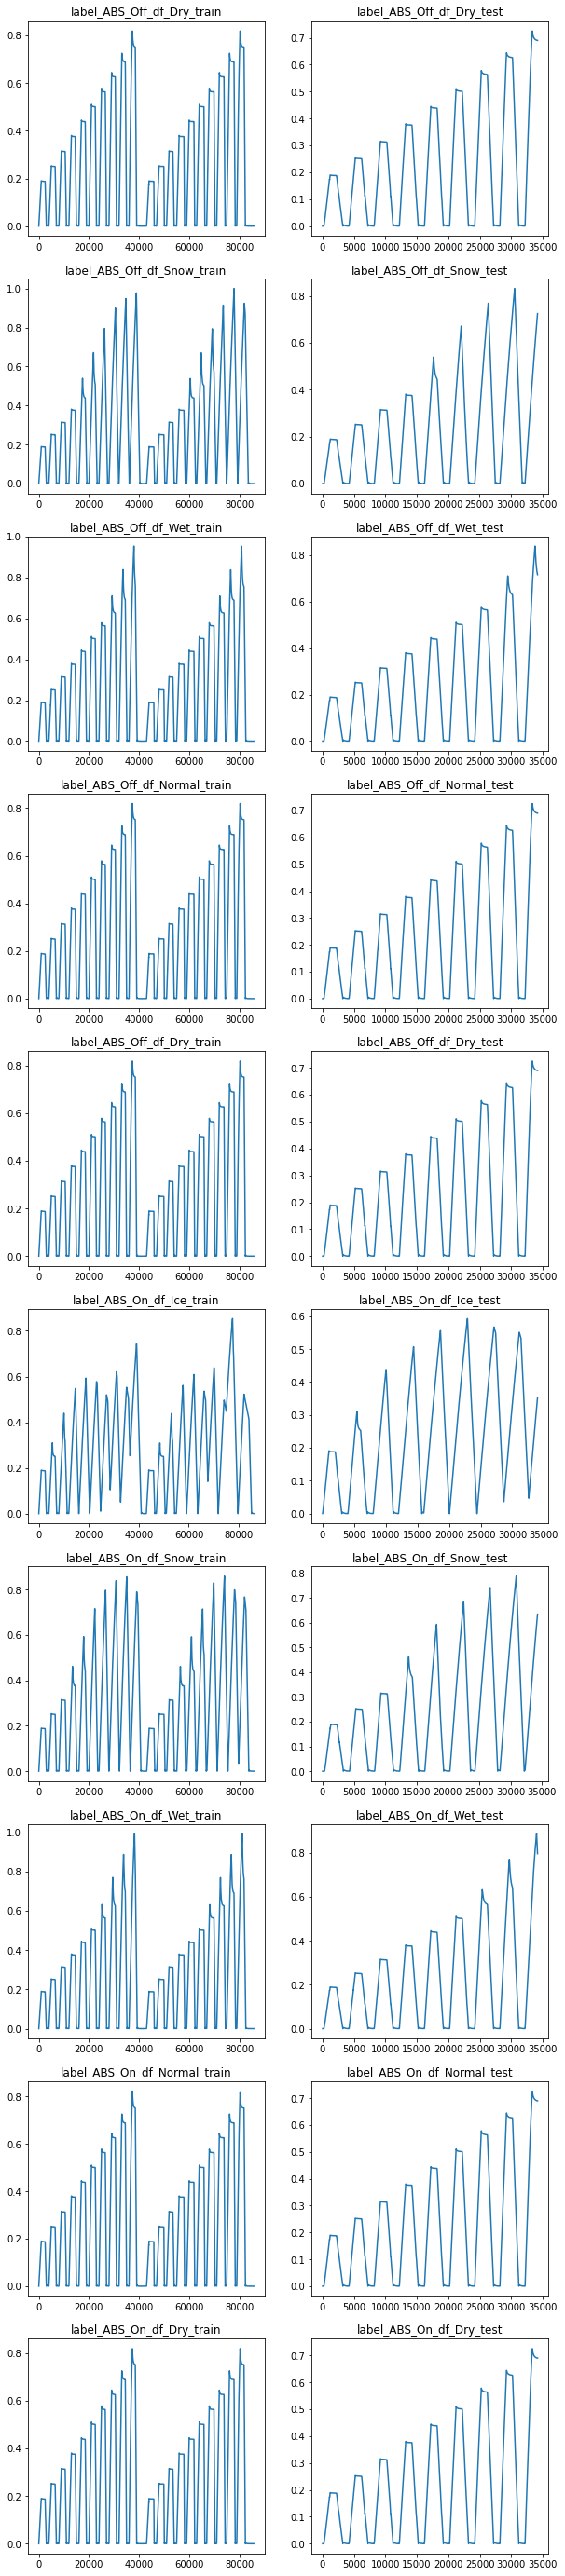

In [ ]:
plt.figure(figsize = (10,50))
plt.grid()
plt.subplot(10,2,1)
plt.title('label_ABS_Off_df_Dry_train')
plt.plot(label_ABS_Off_df_Dry_train)

plt.subplot(10,2,2)
plt.title('label_ABS_Off_df_Dry_test')
plt.plot(label_ABS_Off_df_Dry_test)

plt.subplot(10,2,3)
plt.title('label_ABS_Off_df_Snow_train')
plt.plot(label_ABS_Off_df_Snow_train)

plt.subplot(10,2,4)
plt.title('label_ABS_Off_df_Snow_test')
plt.plot(label_ABS_Off_df_Snow_test)

plt.subplot(10,2,5)
plt.title('label_ABS_Off_df_Wet_train')
plt.plot(label_ABS_Off_df_Wet_train)

plt.subplot(10,2,6)
plt.title('label_ABS_Off_df_Wet_test')
plt.plot(label_ABS_Off_df_Wet_test)


plt.subplot(10,2,7)
plt.title('label_ABS_Off_df_Normal_train')
plt.plot(label_ABS_Off_df_Normal_train)

plt.subplot(10,2,8)
plt.title('label_ABS_Off_df_Normal_test')
plt.plot(label_ABS_Off_df_Normal_test)


plt.subplot(10,2,9)
plt.title('label_ABS_Off_df_Dry_train')
plt.plot(label_ABS_Off_df_Dry_train)

plt.subplot(10,2,10)
plt.title('label_ABS_Off_df_Dry_test')
plt.plot(label_ABS_Off_df_Dry_test)

plt.subplot(10,2,11)
plt.title('label_ABS_On_df_Ice_train')
plt.plot(label_ABS_On_df_Ice_train)

plt.subplot(10,2,12)
plt.title('label_ABS_On_df_Ice_test')
plt.plot(label_ABS_On_df_Ice_test)

plt.subplot(10,2,13)
plt.title('label_ABS_On_df_Snow_train')
plt.plot(label_ABS_On_df_Snow_train)

plt.subplot(10,2,14)
plt.title('label_ABS_On_df_Snow_test')
plt.plot(label_ABS_On_df_Snow_test)

plt.subplot(10,2,15)
plt.title('label_ABS_On_df_Wet_train')
plt.plot(label_ABS_On_df_Wet_train)

plt.subplot(10,2,16)
plt.title('label_ABS_On_df_Wet_test')
plt.plot(label_ABS_On_df_Wet_test)


plt.subplot(10,2,17)
plt.title('label_ABS_On_df_Normal_train')
plt.plot(label_ABS_On_df_Normal_train)

plt.subplot(10,2,18)
plt.title('label_ABS_On_df_Normal_test')
plt.plot(label_ABS_On_df_Normal_test)


plt.subplot(10,2,19)
plt.title('label_ABS_On_df_Dry_train')
plt.plot(label_ABS_On_df_Dry_train)

plt.subplot(10,2,20)
plt.title('label_ABS_On_df_Dry_test')
plt.plot(label_ABS_On_df_Dry_test)



plt.show()

In [ ]:
# 4.1 Feature/ label 생성

window_size = 2

def make_sequene_dataset(feature, label, window_size):
  feature_list = [] # 생성될 feature list
  label_list = [] # 생성될 label list

  for i in range(len(feature)- window_size):
    feature_list.append(feature[i:i+window_size])
    label_list.append(label[i+window_size])

  return np.array(feature_list), np.array(label_list)

## Train
Train_X_ABS_Off_Ice, Train_Y_ABS_Off_Ice, = make_sequene_dataset(feature_ABS_Off_df_Ice_train, label_ABS_Off_df_Ice_train, window_size)             
Train_X_ABS_Off_Snow, Train_Y_ABS_Off_Snow, = make_sequene_dataset(feature_ABS_Off_df_Snow_train, label_ABS_Off_df_Snow_train, window_size)         
Train_X_ABS_Off_Wet, Train_Y_ABS_Off_Wet, = make_sequene_dataset(feature_ABS_Off_df_Wet_train, label_ABS_Off_df_Wet_train, window_size)             
Train_X_ABS_Off_Normal, Train_Y_ABS_Off_Normal, = make_sequene_dataset(feature_ABS_Off_df_Normal_train, label_ABS_Off_df_Normal_train, window_size)  
Train_X_ABS_Off_Dry, Train_Y_ABS_Off_Dry, = make_sequene_dataset(feature_ABS_Off_df_Dry_train, label_ABS_Off_df_Dry_train, window_size)
Train_X_ABS_On_Ice, Train_Y_ABS_On_Ice, = make_sequene_dataset(feature_ABS_On_df_Ice_train, label_ABS_On_df_Ice_train, window_size)                 
Train_X_ABS_On_Snow, Train_Y_ABS_On_Snow, = make_sequene_dataset(feature_ABS_On_df_Snow_train, label_ABS_On_df_Snow_train, window_size)             
Train_X_ABS_On_Wet, Train_Y_ABS_On_Wet, = make_sequene_dataset(feature_ABS_On_df_Wet_train, label_ABS_On_df_Wet_train, window_size)                 
Train_X_ABS_On_Normal, Train_Y_ABS_On_Normal, = make_sequene_dataset(feature_ABS_On_df_Normal_train, label_ABS_On_df_Normal_train, window_size)
Train_X_ABS_On_Dry, Train_Y_ABS_On_Dry, = make_sequene_dataset(feature_ABS_On_df_Dry_train, label_ABS_On_df_Dry_train, window_size)             

## Test
Test_X_ABS_Off_Ice, Test_Y_ABS_Off_Ice, = make_sequene_dataset(feature_ABS_Off_df_Ice_test, label_ABS_Off_df_Ice_test, window_size)             
Test_X_ABS_Off_Snow, Test_Y_ABS_Off_Snow, = make_sequene_dataset(feature_ABS_Off_df_Snow_test, label_ABS_Off_df_Snow_test, window_size)         
Test_X_ABS_Off_Wet, Test_Y_ABS_Off_Wet, = make_sequene_dataset(feature_ABS_Off_df_Wet_test, label_ABS_Off_df_Wet_test, window_size)             
Test_X_ABS_Off_Normal, Test_Y_ABS_Off_Normal, = make_sequene_dataset(feature_ABS_Off_df_Normal_test, label_ABS_Off_df_Normal_test, window_size)  
Test_X_ABS_Off_Dry, Test_Y_ABS_Off_Dry, = make_sequene_dataset(feature_ABS_Off_df_Dry_test, label_ABS_Off_df_Dry_test, window_size)
Test_X_ABS_On_Ice, Test_Y_ABS_On_Ice, = make_sequene_dataset(feature_ABS_On_df_Ice_test, label_ABS_On_df_Ice_test, window_size)                 
Test_X_ABS_On_Snow, Test_Y_ABS_On_Snow, = make_sequene_dataset(feature_ABS_On_df_Snow_test, label_ABS_On_df_Snow_test, window_size)             
Test_X_ABS_On_Wet, Test_Y_ABS_On_Wet, = make_sequene_dataset(feature_ABS_On_df_Wet_test, label_ABS_On_df_Wet_test, window_size)                 
Test_X_ABS_On_Normal, Test_Y_ABS_On_Normal, = make_sequene_dataset(feature_ABS_On_df_Normal_test, label_ABS_On_df_Normal_test, window_size)
Test_X_ABS_On_Dry, Test_Y_ABS_On_Dry, = make_sequene_dataset(feature_ABS_On_df_Dry_test, label_ABS_On_df_Dry_test, window_size)   

print('Train_X_ABS_Off_Ice.shape, Train_Y_ABS_Off_Ice.shape :',Train_X_ABS_Off_Ice.shape, Train_Y_ABS_Off_Ice.shape)
print('Test_X_ABS_Off_Ice.shape, Test_Y_ABS_Off_Ice.shape :',Test_X_ABS_Off_Ice.shape, Test_Y_ABS_Off_Ice.shape)

Train_X_ABS_Off_Ice.shape, Train_Y_ABS_Off_Ice.shape : (85178, 2, 7) (85178, 1)
Test_X_ABS_Off_Ice.shape, Test_Y_ABS_Off_Ice.shape : (34819, 2, 7) (34819, 1)


X_Train.shape : (857440, 2, 7)
Y_Train.shape : (857440, 1)
X_Test.shape : (342530, 2, 7)
Y_Test.shape: (342530, 1)


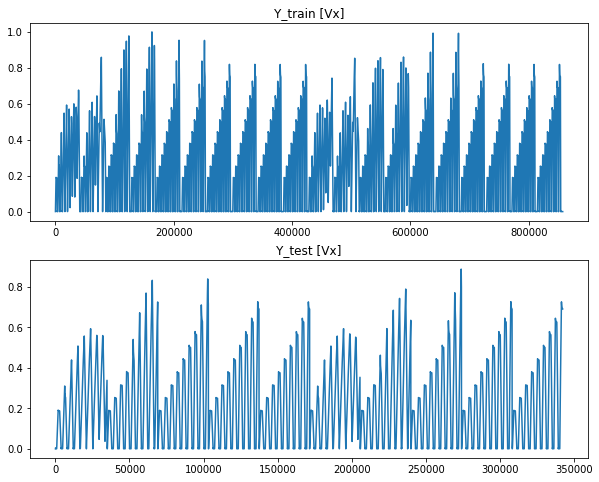

In [ ]:
# 4.2 Train/Test 데이터 생성
X_Train = np.concatenate((Train_X_ABS_Off_Ice, Train_X_ABS_Off_Snow, Train_X_ABS_Off_Wet, \
                          Train_X_ABS_Off_Normal, Train_X_ABS_Off_Dry, Train_X_ABS_On_Ice,\
                          Train_X_ABS_On_Snow, Train_X_ABS_On_Wet, Train_X_ABS_On_Normal, Train_X_ABS_On_Dry ), axis = 0)

Y_Train = np.concatenate((Train_Y_ABS_Off_Ice, Train_Y_ABS_Off_Snow, Train_Y_ABS_Off_Wet, \
                          Train_Y_ABS_Off_Normal, Train_Y_ABS_Off_Dry, Train_Y_ABS_On_Ice,\
                          Train_Y_ABS_On_Snow, Train_Y_ABS_On_Wet, Train_Y_ABS_On_Normal, Train_Y_ABS_On_Dry), axis = 0)

X_Test = np.concatenate((Test_X_ABS_Off_Ice, Test_X_ABS_Off_Snow, Test_X_ABS_Off_Wet, \
                          Test_X_ABS_Off_Normal, Test_X_ABS_Off_Dry, Test_X_ABS_On_Ice,\
                          Test_X_ABS_On_Snow, Test_X_ABS_On_Wet, Test_X_ABS_On_Normal, Test_X_ABS_On_Dry), axis = 0)

Y_Test = np.concatenate((Test_Y_ABS_Off_Ice, Test_Y_ABS_Off_Snow, Test_Y_ABS_Off_Wet, \
                          Test_Y_ABS_Off_Normal, Test_Y_ABS_Off_Dry, Test_Y_ABS_On_Ice,\
                          Test_Y_ABS_On_Snow, Test_Y_ABS_On_Wet, Test_Y_ABS_On_Normal, Test_Y_ABS_On_Dry), axis = 0)

# X_Train = np.concatenate((X_ABS_Off_Ice,X_ABS_Off_Snow,X_ABS_Off_Wet,X_ABS_Off_Normal, X_ABS_On_Ice,X_ABS_On_Wet,X_ABS_On_Dry), axis = 0)
# Y_Train = np.concatenate((Y_ABS_Off_Ice,Y_ABS_Off_Snow,Y_ABS_Off_Wet,Y_ABS_Off_Normal,Y_ABS_On_Ice,Y_ABS_On_Wet,Y_ABS_On_Dry), axis = 0)
# X_Test = np.concatenate((X_ABS_Off_Dry,X_ABS_On_Normal, X_ABS_On_Snow), axis = 0)
# Y_Test = np.concatenate((Y_ABS_Off_Dry,Y_ABS_On_Normal,Y_ABS_On_Snow), axis = 0)

print('X_Train.shape :',X_Train.shape)
print('Y_Train.shape :',Y_Train.shape)
print('X_Test.shape :',X_Test.shape)
print('Y_Test.shape:',Y_Test.shape)

plt.figure(figsize = (10,8))
plt.grid()
plt.subplot(2,1,1)
plt.title('Y_train [Vx]')
plt.plot(Y_Train)

plt.subplot(2,1,2)
plt.title('Y_test [Vx]')
plt.plot(Y_Test)

plt.show()


In [ ]:
# 5-A. 모델 생성하고 학습하기
model = Sequential()

# LSTM에 tanh를 활성화 함수로 가지는 노드 수 512개
# input shape = (10,3) 
model.add(LSTM(8, activation = 'tanh', input_shape = X_Train[0].shape))

model.add(Dense(1, activation = 'relu'))

model.summary()

# 모델 컴파일 및 학습

from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

early_stop = EarlyStopping(monitor = 'val_mae', patience = 5)

model.fit(X_Train, Y_Train, validation_data = (X_Test, Y_Test), epochs = 100, batch_size = 8, callbacks= [early_stop])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 512       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
107180/107180 [==============================] - 492s 5ms/step - loss: 2.4990e-04 - mae: 0.0061 - val_loss: 1.4034e-04 - val_mae: 0.0071
Epoch 2/100
107180/107180 [==============================] - 482s 4ms/step - loss: 7.3155e-05 - mae: 0.0052 - val_loss: 1.1971e-04 - val_mae: 0.0059
Epoch 3/100
107180/107180 [==============================] - 481s 4ms/step - loss: 6.9185e-05 - mae: 0.0050 - val_loss: 1.2104e-04 - val_mae: 0.0060
Epoch 4/100
107180/107180 [==============================] - 474s 4ms/ste

In [ ]:
# 5-B. 모델 불러오기

model = keras.models.load_model('./saved_model/mymodel_0810.h5')


print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               268288    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________
None
119943


In [ ]:
# 5-C 모델 저장하기.  (이름은 날짜에 따라 바꿀 것. 저장 후 로컬로 옮길 것.)
model.save('my_model.h5')

In [ ]:
# 5-2 비교를 위한 test data 
Test_data = np.concatenate((feature_ABS_Off_df_Dry[window_size:],feature_ABS_On_df_Normal[window_size:],feature_ABS_On_df_Snow[window_size:]), axis = 0)

Test_Vw = Test_data[:,0] 
Test_Vx_kalman =Test_data[:,4] 
print(len(Test_Vw))

# 정규화 반대로 복원
Test_Vw_plot = Test_Vw*(Vw_max-Vw_min) + Vw_min
Test_Vx_kalman_plot =Test_Vx_kalman*(Vx_kalman_max-Vx_kalman_min) + Vx_kalman_min
Y_Test_plot = Y_Test*(Vx_max-Vx_min) + Vx_min

abs_error = 0

for i in range(len(Y_Test_plot)):
  abs_error += abs(Y_Test_plot[i][0]-Test_Vx_kalman_plot[i])

abs_error

abs_error_avg = abs_error/len(Y_Test_plot)
# kalman filter의 average error
abs_error_avg

119943


0.16704749676933955

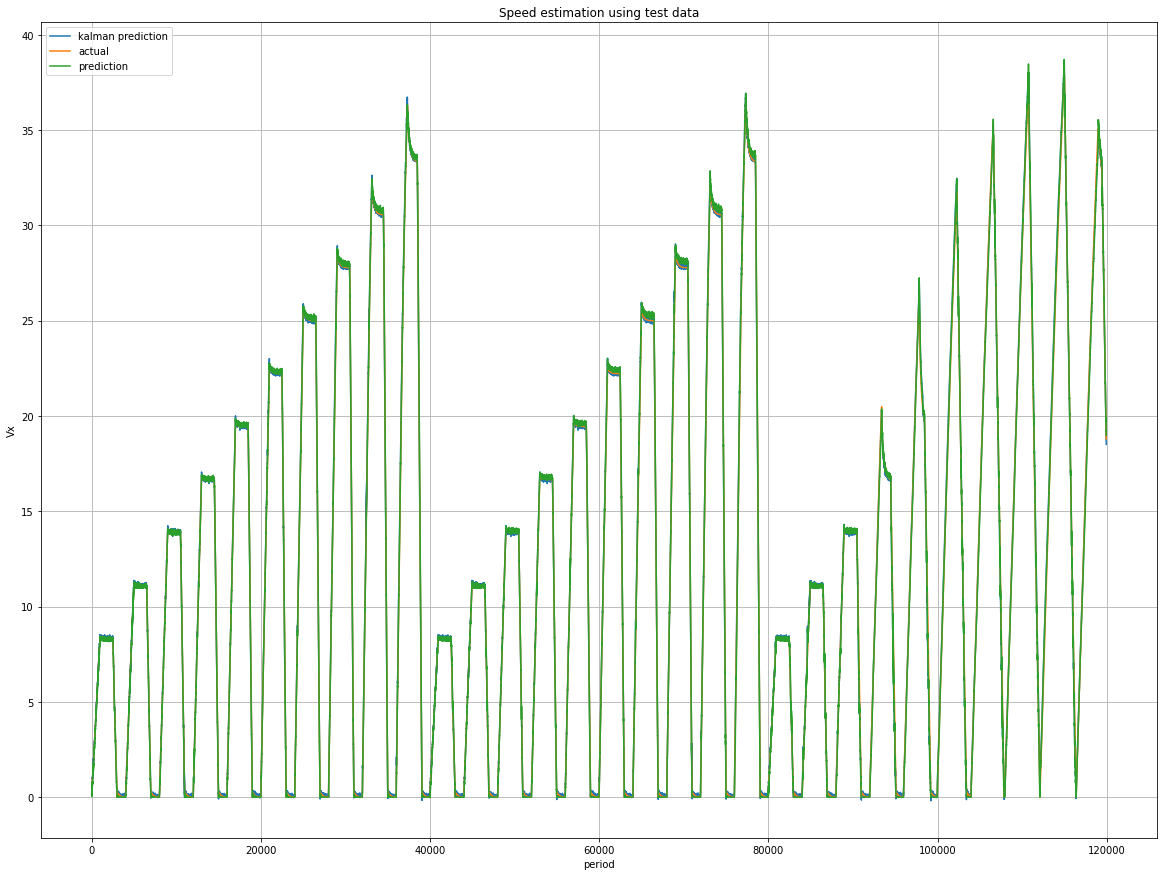

In [ ]:
# 5-3 예측 및 비교
pred = model.predict(X_Test)

# 정규화 반대로 복원
pred_plot = pred*(Vx_max-Vx_min) + Vx_min

plt.figure(figsize = (20,15))
plt.title('Speed estimation using test data')
plt.ylabel('Vx')
plt.xlabel('period')

plt.plot(Test_Vx_kalman_plot, label = 'kalman prediction')
plt.plot(Y_Test_plot, label = 'actual')
plt.plot(pred_plot, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

In [ ]:
# 5-4 Kalman + RNN 의 error 와 kalman filter의 error 구하기
error = abs(Y_Test_plot-pred_plot)

# Average ABS error
avg = 0 
for i in range(len(error)):
  avg += error[i][0]

avg = avg/len(error)
avg

0.19052548099193806

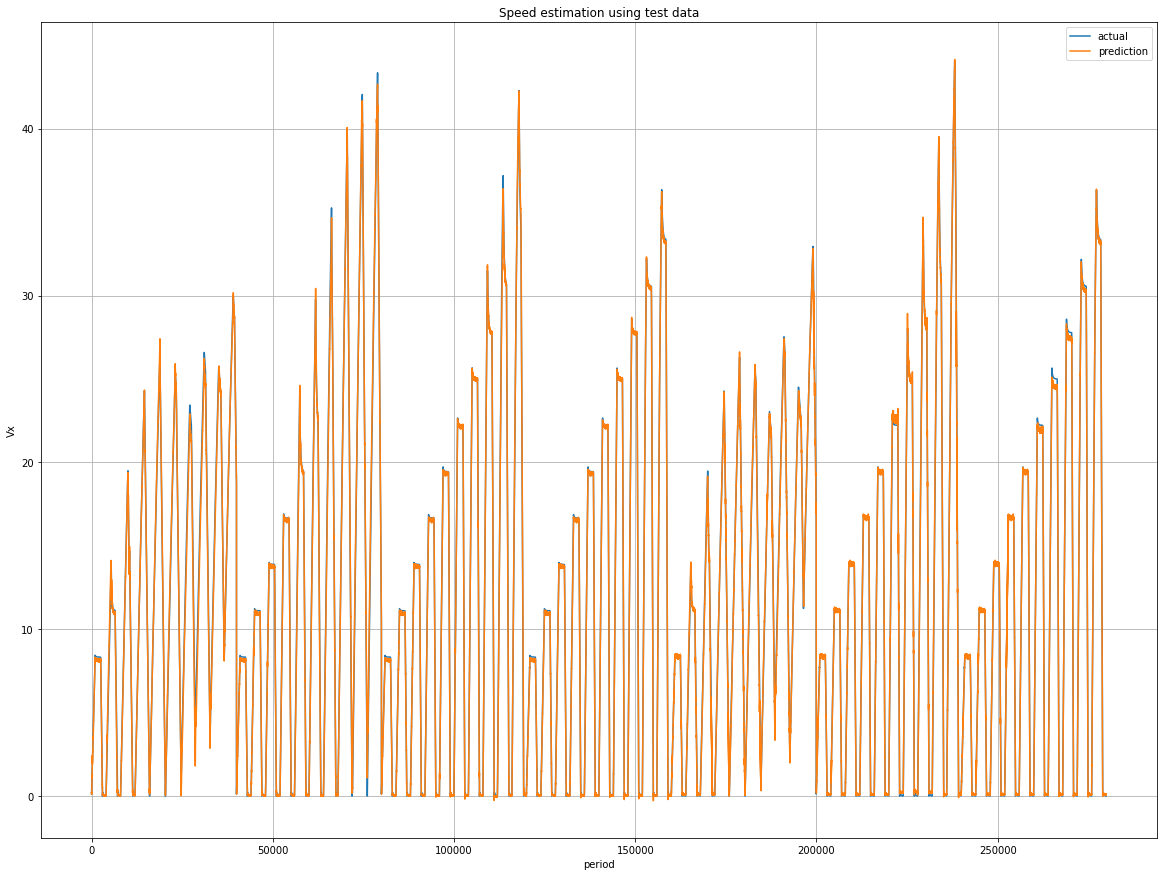

In [ ]:
# 5-3 예측 및 비교
pred = model.predict(X_Train)

# 정규화 반대로 복원
pred_plot = pred*(Vx_max-Vx_min) + Vx_min
Y_train_plot = Y_Train*(Vx_max-Vx_min) + Vx_min

plt.figure(figsize = (20,15))
plt.title('Speed estimation using test data')
plt.ylabel('Vx')
plt.xlabel('period')


plt.plot(Y_train_plot, label = 'actual')
plt.plot(pred_plot, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

In [ ]:
# 5-4 Kalman + RNN 의 error 와 kalman filter의 error 구하기
error = abs(Y_train_plot-pred_plot)

# Average ABS error
avg = 0 
for i in range(len(error)):
  avg += error[i][0]

avg = avg/len(error)
avg

0.25405785894465666